In [1]:
# Normal Imports
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [121]:
metricsdf = pd.read_csv('merged_dataframe_updated.csv')

mat_df=metricsdf[['DNA_UNIQUE_ID','Variety Group (Tree)1',
                  'days_to_mat','source_country','rice_blast']]
print mat_df.shape
mat_df.head()

(2347, 5)


,DNA_UNIQUE_ID,Variety Group (Tree)1,days_to_mat,source_country,rice_blast
0,IRIS 313-9783,Japonica,110,AFGHANISTAN,NaN
1,IRIS 313-10509,Indica,164,AFRICA,Susceptible
2,IRIS 313-9778,Indica,119,ARGENTINA,NaN
3,IRIS 313-9980,Japonica,110,ARGENTINA,NaN
4,IRIS 313-9795,Indica,135,AUSTRALIA,Susceptible


count: 2344
min: 80
max: 214
mean: 131.939419795
std: 24.4010276948


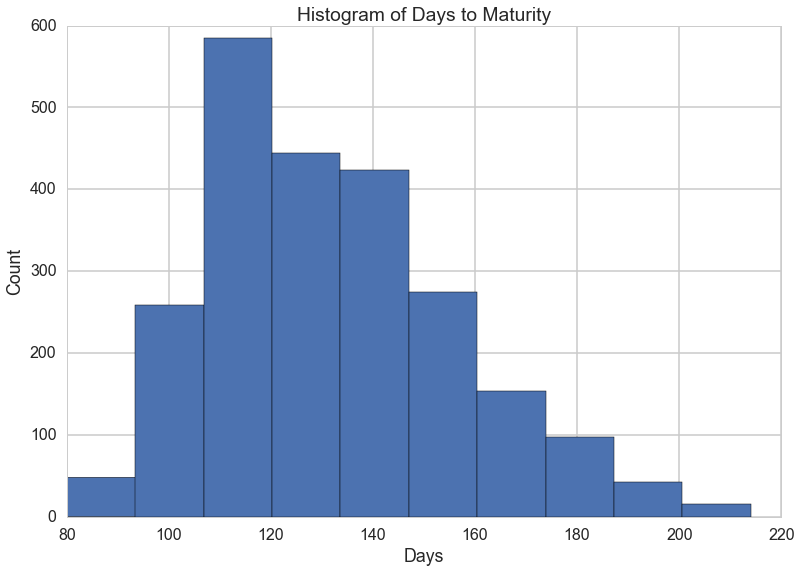

In [122]:
mat_df = mat_df[mat_df['days_to_mat'] != 0]

plt.hist(mat_df['days_to_mat'])
plt.title("Histogram of Days to Maturity")
plt.xlabel("Days")
plt.ylabel("Count")

days_list = np.array(mat_df['days_to_mat'])

print "count: " + str(len(days_list))
print "min: " + str(days_list.min())
print "max: " + str(days_list.max())
print "mean: " + str(days_list.mean())
print "std: " + str(days_list.std())

In [123]:
fast_grow = [mat_df['days_to_mat'] < (days_list.mean() - days_list.std())]
mat_df['fast'] = fast_grow[0]
mat_df.head(10)

,DNA_UNIQUE_ID,Variety Group (Tree)1,days_to_mat,source_country,rice_blast,fast
0,IRIS 313-9783,Japonica,110,AFGHANISTAN,NaN,False
1,IRIS 313-10509,Indica,164,AFRICA,Susceptible,False
2,IRIS 313-9778,Indica,119,ARGENTINA,NaN,False
3,IRIS 313-9980,Japonica,110,ARGENTINA,NaN,False
4,IRIS 313-9795,Indica,135,AUSTRALIA,Susceptible,False
5,IRIS 313-9771,Tropical japonica,119,AUSTRIA,NaN,False
6,IRIS 313-11482,Aus/boro,133,BANGLADESH,Resistant,False
7,IRIS 313-11481,Aus/boro,118,BANGLADESH,Resistant,False
8,IRIS 313-11483,Aus/boro,107,BANGLADESH,Resistant,True
9,IRIS 313-11048,Aus/boro,98,BANGLADESH,Susceptible,True


In [124]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(mat_df.shape[0]), train_size=0.7)
mask=np.ones(mat_df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)
mask.shape, mask.sum()

((2344,), 1640)

In [125]:
from sklearn.preprocessing import StandardScaler

mat_df[['days_to_mat']] = mat_df[['days_to_mat']].astype(float)

std_scale = StandardScaler().fit(mat_df[mask]['days_to_mat'])
mat_df['stdardized_mat'] = std_scale.transform(mat_df['days_to_mat'])
mat_df['z_score'] = [(((mat_df['days_to_mat'])- days_list.mean())/days_list.std())][0]

mat_df.head()

,DNA_UNIQUE_ID,Variety Group (Tree)1,days_to_mat,source_country,rice_blast,fast,stdardized_mat,z_score
0,IRIS 313-9783,Japonica,110,AFGHANISTAN,NaN,False,-0.910445,-0.899119
1,IRIS 313-10509,Indica,164,AFRICA,Susceptible,False,1.329374,1.313903
2,IRIS 313-9778,Indica,119,ARGENTINA,NaN,False,-0.537142,-0.530282
3,IRIS 313-9980,Japonica,110,ARGENTINA,NaN,False,-0.910445,-0.899119
4,IRIS 313-9795,Indica,135,AUSTRALIA,Susceptible,False,0.126508,0.125428


In [135]:
print "% fast: " + str(sum(mat_df['fast'])/float(len((mat_df['fast']))) * 100)
print "% slow: " + str((1. -sum(mat_df['fast'])/float(len((mat_df['fast'])))) * 100)

% fast: 15.1023890785
% slow: 84.8976109215


BASE LINE THEN PREDICTS THAT EVERYTHING IS SLOW IS 85% ACCURATE

In [141]:
mat_df.to_csv('mat_df')

,DNA_UNIQUE_ID,Variety Group (Tree)1,days_to_mat,source_country,rice_blast,fast,stdardized_mat,z_score
0,IRIS 313-9783,Japonica,110,AFGHANISTAN,NaN,False,-0.910445,-0.899119
2,IRIS 313-9778,Indica,119,ARGENTINA,NaN,False,-0.537142,-0.530282
3,IRIS 313-9980,Japonica,110,ARGENTINA,NaN,False,-0.910445,-0.899119
4,IRIS 313-9795,Indica,135,AUSTRALIA,Susceptible,False,0.126508,0.125428
5,IRIS 313-9771,Tropical japonica,119,AUSTRIA,NaN,False,-0.537142,-0.530282
7,IRIS 313-11481,Aus/boro,118,BANGLADESH,Resistant,False,-0.578620,-0.571264
8,IRIS 313-11483,Aus/boro,107,BANGLADESH,Resistant,True,-1.034879,-1.022064
10,IRIS 313-11049,Aus/boro,92,BANGLADESH,Resistant,True,-1.657051,-1.636793
11,IRIS 313-11050,Aus/boro,98,BANGLADESH,Resistant,True,-1.408182,-1.390901
13,IRIS 313-11052,Aus/boro,98,BANGLADESH,Susceptible,True,-1.408182,-1.390901
